# Space Dividing Halfspace Error Approximation
The idea is that we divide the space into pre-defined segments.
Then we randomly sample the space and assign labels to the samples according to which segment they fall in.
We then compute the amount of transitions that happen and compare it to the actual amount of transitions that should happen.

In [ ]:
# Import necessary libraries
import sys
sys.path.extend(["../../"])
from src.para_voro import *
from src.para_voro_plots import *

# Create a sample dataset with 10 samples
np.random.seed(0)

In [2]:
# space dividing halfspace
np.random.seed(0)
dim = 2
hs = make_lower_halfspace(0.5, n_dim=dim, dim=0)

aabbox = np.array([
    [0.0, 1.0],
    [0.0, 1.0],
    [0.0, 1.0],
])[:dim]

bws = np.array([0.1, 0.1, 0.1])[:dim]

In [3]:
n_samples = 300
samples = np.random.random((n_samples, dim))

In [4]:
labels = (samples @ hs[:-1] + hs[-1]) >= 0

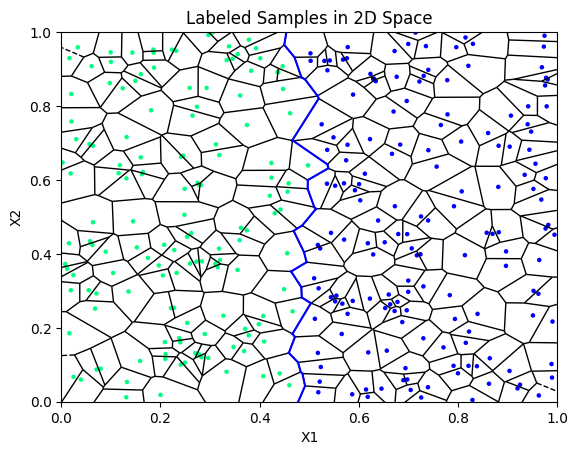

In [5]:
if dim <= 3:
    plot_data(samples, labels, aabbox)

In [6]:
rv = generate_geometric_segment_boundaries_via_voronoi(samples, labels, aabbox)

c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro.py:308: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 1, 'C', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  d = np.dot(points[i], ridge_halfspace_definition[:-1]) + ridge_halfspace_definition[-1]


In [7]:
sp, sens, nrid = ridge_based_para_sense(rv, bws, aabbox, return_n_ridges=True)

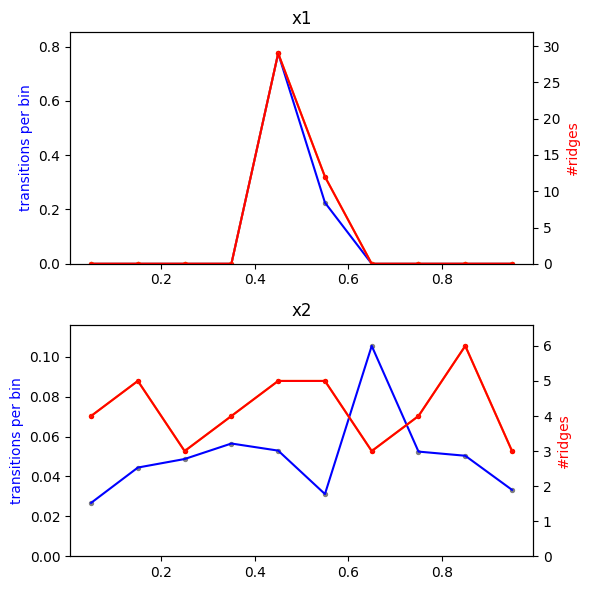

In [8]:
plot_sensitivities(sp, sens, n_ridges=nrid)

In [9]:
def center_sens(n_samples):
    samples = np.random.random((n_samples, dim))
    labels = (samples @ hs[:-1] + hs[-1]) >= 0
    rv = generate_geometric_segment_boundaries_via_voronoi(samples, labels, aabbox)
    sp, sens, nrid = ridge_based_para_sense(rv, bws, aabbox, return_n_ridges=True)
    return sens[0][[sens[0].shape[0] // 2]].sum()

In [10]:
def sum_sens(n_samples):
    samples = np.random.random((n_samples, dim))
    labels = (samples @ hs[:-1] + hs[-1]) >= 0
    rv = generate_geometric_segment_boundaries_via_voronoi(samples, labels, aabbox)
    sp, sens, nrid = ridge_based_para_sense(rv, bws, aabbox, return_n_ridges=True)
    return sens[0].sum()

In [11]:
n_samples = ((np.arange(50) + 3) ** 1.25).astype(int)
n_trials_per_n_samples = 20

In [12]:
center_senses = [sum(center_sens(n_) for _ in range(n_trials_per_n_samples)) / n_trials_per_n_samples for n_ in n_samples]

In [13]:
sum_senses = [sum(sum_sens(n_) for _ in range(n_trials_per_n_samples)) / n_trials_per_n_samples for n_ in n_samples]

In [14]:
# fit curve
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return -a * np.exp(-b * x) + c

popt, pcov = curve_fit(func, n_samples, center_senses)
popt2, pcov2 = curve_fit(func, n_samples, sum_senses)

C:\Users\bauerrn\AppData\Local\Temp\ipykernel_32596\3861754007.py:4: RuntimeWarning: overflow encountered in exp
  return -a * np.exp(-b * x) + c


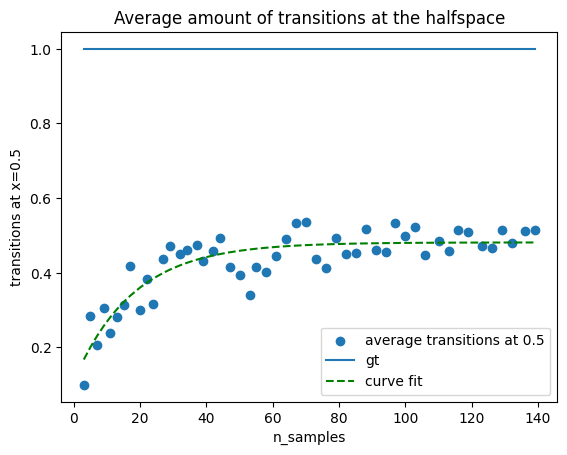

In [15]:
plt.close()
fig = plt.figure()
ax = fig.gca()

ax.scatter(n_samples, center_senses, label="average transitions at 0.5")
ax.plot(n_samples[[0, -1]], [1.0, 1.0], label="gt")
ax.plot(n_samples, func(n_samples, *popt), 'g--', label="curve fit")

ax.set_title("Average amount of transitions at the halfspace")
ax.set_xlabel("n_samples")
ax.set_ylabel("transitions at x=0.5")
plt.legend()
plt.show()

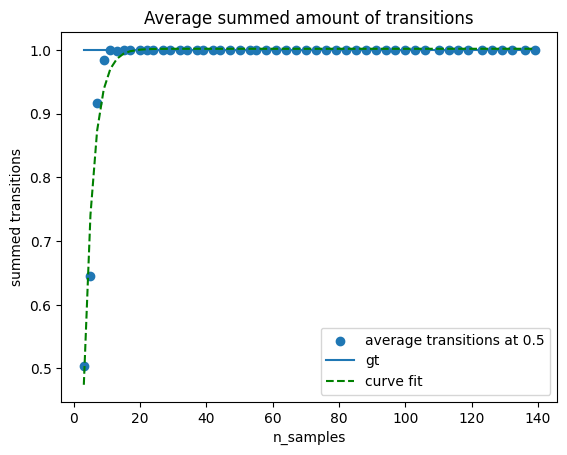

In [16]:
plt.close()
fig = plt.figure()
ax = fig.gca()

ax.scatter(n_samples, sum_senses, label="average transitions at 0.5")
ax.plot(n_samples[[0, -1]], [1.0, 1.0], label="gt")
ax.plot(n_samples, func(n_samples, *popt2), 'g--', label="curve fit")

ax.set_title("Average summed amount of transitions")
ax.set_xlabel("n_samples")
ax.set_ylabel("summed transitions")
plt.legend()
plt.show()

In [17]:
def all_sens(n_samples):
    samples = np.random.random((n_samples, dim))
    labels = (samples @ hs[:-1] + hs[-1]) >= 0
    rv = generate_geometric_segment_boundaries_via_voronoi(samples, labels, aabbox)
    sp, sens, nrid = ridge_based_para_sense(rv, bws, aabbox, return_n_ridges=True)
    return sens

In [18]:
all_sens(500)[0]

array([0.       , 0.       , 0.       , 0.       , 0.5400863, 0.4599137,
       0.       , 0.       , 0.       , 0.       ])